# Moisture and Density Residue Correlation to Splice
The samples for this study were taken from the shipboard residues for moisture and density (MAD) samples. Moisture and density sampling was performed on sediment from Hole A. Thus, samples do not always fall on the splice. Here, we use shipboard logs (predominantly magnetic susceptibility, but also RGB and NGR) to correlate the MAD samples from Hole A onto the splice. 

In [590]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [591]:
data_path='/Users/danielbabin/Documents/GitHub/U1474_XRF_Data_Report/Data/'

In [592]:
MAD=pd.read_csv(data_path+'moisture&density.csv').dropna()
MAD['#']=np.arange(1,len(MAD)+1)
MAD.set_index('#',inplace=True)
MAD.rename(columns={'Depth CCSF-361-U1474-ABDEF-20160220 (m)':'Depth (m CCSF)'},inplace=True)

# Records
## Magnetic Susceptibility

In [593]:
MS=pd.read_csv(data_path+'magnetic_susceptibility.csv',low_memory=False)
MS['CoreLabel']=MS['Site']+MS['Hole']+'_'+MS['Core'].map(str)
MS.rename(columns={'Depth CCSF-361-U1474-ABDEF-20160220 (m)':'Depth (m CCSF)'},inplace=True)

## NGR

In [594]:
ngr=pd.read_csv(data_path+'ngr.csv',low_memory=False)
ngr['CoreLabel']=ngr['Site']+ngr['Hole']+'_'+ngr['Core'].map(str)
ngr.rename(columns={'Depth CCSF-361-U1474-ABDEF-20160220 (m)':'Depth (m CCSF)'},inplace=True)

## RGB

In [595]:
rgb=pd.read_csv(data_path+'rgb.csv',low_memory=False)
rgb['CoreLabel']=rgb['Site']+rgb['Hole']+'_'+rgb['Core'].map(str)
rgb.rename(columns={'Depth CCSF-361-U1474-ABDEF-20160220 (m)':'Depth (m CCSF)'},inplace=True)

# Import Splice Info

In [596]:
splice=pd.read_csv(data_path+'U1474_splice_construction.csv').iloc[0:57]
splice['CoreLabel']=(splice['Site']+splice['Hole']+'_'+splice['Core'].map(str))

section_list=pd.read_csv(data_path+'U1474_section_list.csv')
section_list['SectionLabel']=(section_list['Site']+section_list['Hole']+'_'+
                              section_list['Core'].map(str)+section_list['Type']+section_list['Sect'].map(str))
section_list.rename(columns={'Top depth CCSF-361-U1474-ABDEF-20160220 (m)':'Top Depth CCSF (m)',
                            'Bottom depth CCSF-361-U1474-ABDEF-20160220 (m)':'Bottom Depth CCSF (m)'},inplace=True)

# Make Splices
MS

In [597]:
for i,core in enumerate(splice.CoreLabel):
    deeper=MS.loc[MS['CoreLabel']==core,'Depth (m CCSF)']>splice.loc[i,'Top depth CCSF (m)']
    shallower=MS.loc[MS['CoreLabel']==core,'Depth (m CCSF)']<splice.loc[i,'Bottom depth CCSF (m)']
    MS.loc[MS['CoreLabel']==core,'In Splice']=deeper&shallower
MS_splice=MS[MS['In Splice']==True].copy()
MS_splice.set_index('Depth (m CCSF)',inplace=True,drop=False)
MS_splice.sort_index(inplace=True)

NGR

In [616]:
for i,core in enumerate(splice.CoreLabel):
    deeper=ngr.loc[ngr['CoreLabel']==core,'Depth (m CCSF)']>splice.loc[i,'Top depth CCSF (m)']
    shallower=ngr.loc[ngr['CoreLabel']==core,'Depth (m CCSF)']<splice.loc[i,'Bottom depth CCSF (m)']
    ngr.loc[ngr['CoreLabel']==core,'In Splice']=deeper&shallower
ngr_splice=ngr[ngr['In Splice']==True].copy()
ngr_splice.set_index('Depth (m CCSF)',inplace=True,drop=False)
ngr_splice.sort_index(inplace=True)
ngr_splice.drop_duplicates(inplace=True)

RGB

In [621]:
for i,core in enumerate(splice.CoreLabel):
    deeper=rgb.loc[rgb['CoreLabel']==core,'Depth (m CCSF)']>splice.loc[i,'Top depth CCSF (m)']
    shallower=rgb.loc[rgb['CoreLabel']==core,'Depth (m CCSF)']<splice.loc[i,'Bottom depth CCSF (m)']
    rgb.loc[rgb['CoreLabel']==core,'In Splice']=deeper&shallower
rgb_splice=rgb[rgb['In Splice']==True].copy()
rgb_splice.set_index('Depth (m CCSF)',inplace=True,drop=False)
rgb_splice.sort_index(inplace=True)
rgb_splice.drop_duplicates(inplace=True)

# View

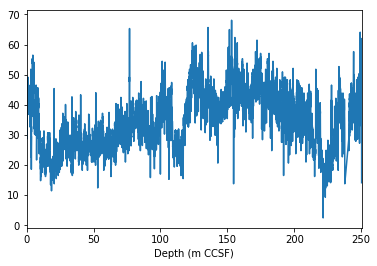

In [600]:
MS_splice['Magnetic susceptibility (instr. units)'].plot()

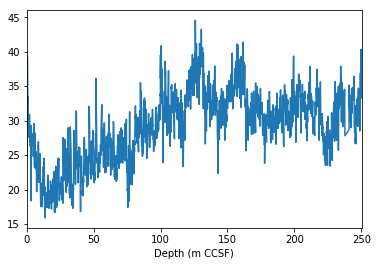

In [601]:
ngr_splice['NGR total counts (cps)'].plot()

# Compare MAD Samples to Splice Record
MS

In [471]:
MSA=MS[MS['Hole']=='A'].copy()
MSA.set_index('Depth CSF-A (m)',inplace=True,drop=False)
MSA.sort_index(inplace=True)

MS_spliceA=MS_splice.loc[MS_splice['Hole']=='A']
MS_spliceA_CSFA=MS_spliceA.set_index('Depth CSF-A (m)',drop=False)
MS_spliceA_CCSF=MS_spliceA.set_index('Depth (m CCSF)',drop=False)

MADA=MAD[MAD['Hole']=='A'].copy()

NGR

In [580]:
ngrA=ngr[ngr['Hole']=='A'].copy()
ngrA.set_index('Depth CSF-A (m)',inplace=True,drop=False)
ngrA.sort_index(inplace=True)

ngr_spliceA=ngr_splice.loc[ngr_splice['Hole']=='A']
ngr_spliceA_CSFA=ngr_spliceA.set_index('Depth CSF-A (m)',drop=False)
ngr_spliceA_CCSF=ngr_spliceA.set_index('Depth (m CCSF)',drop=False)

RGB

In [668]:
rgbA=rgb[rgb['Hole']=='A'].iloc[1:].dropna().copy()
rgbA.set_index('Depth CSF-A (m)',inplace=True,drop=False)
rgbA=rgbA[~rgbA.index.duplicated()]
rgbA.sort_index(inplace=True)

rgb_spliceA=rgb_splice.loc[rgb_splice['Hole']=='A'].dropna()
rgb_spliceA=rgb_spliceA[~rgb_spliceA.index.duplicated()]
rgb_spliceA.sort_index(inplace=True)


rgb_spliceA_CSFA=rgb_spliceA.set_index('Depth CSF-A (m)',drop=False)
rgb_spliceA_CCSF=rgb_spliceA.set_index('Depth (m CCSF)',drop=False)

## MAD Samples Hole A
Here is a table of all of the MAD samples from Hole A

In [653]:
MADA=MAD[MAD['Hole']=='A'].copy()
MADA

Exp   Site Hole  Core Type  Sect A/W  Offset (cm)  Depth CSF-A (m)  \
#                                                                        
1   361  U1474    A     1    H     1   W         92.0            0.920   
2   361  U1474    A     1    H     3   W         57.0            3.570   
3   361  U1474    A     2    H     1   W        129.0            6.690   
4   361  U1474    A     2    H     3   W         51.0            8.910   
5   361  U1474    A     2    H     5   W         20.0           11.600   
6   361  U1474    A     2    H     7   W         22.5           14.335   
7   361  U1474    A     3    H     1   W         76.0           15.660   
8   361  U1474    A     3    H     3   W         76.0           18.660   
9   361  U1474    A     3    H     5   W         76.0           21.660   
10  361  U1474    A     3    H     7   W         30.0           23.700   
11  361  U1474    A     4    H     2   A         84.0           26.740   
12  361  U1474    A     4    H     4   W        113.0           30.030   
13  361  U1474    A     4    H     7   W         33.0           33.730   
14  361  U1474    A     5    H     1   W         84.0           34.740   
15  361  U1474    A     5    H     3   W         84.0           37.740   
16  361  U1474    A     5    H     5   W         23.0           40.130   
17  361  U1474    A     6    H     2   W         77.0           45.670   
18  361  U1474    A     6    H     5   W         84.0           50.240   
19  361  U1474    A     6    H     7   W         54.0           52.940   
20  361  U1474    A     7    H     3   W         54.0           56.440   
21  361  U1474    A     7    H     5   W         93.5           59.835   
22  361  U1474    A     7    H     7   W         52.0           62.420   
23  361  U1474    A     8    H     2   W         69.0           64.590   
24  361  U1474    A     8    H     4   W         84.0           67.740   
25  361  U1474    A     8    H     6   W         84.0           70.740   
26  361  U1474    A     9    H     2   W        114.5           74.545   
27  361  U1474    A     9    H     4   W        104.0           77.440   
28  361  U1474    A     9    H     6   W        102.0           80.420   
29  361  U1474    A    10    H     2   W        106.0           83.960   
30  361  U1474    A    10    H     4   W        106.0           86.960   
..  ...    ...  ...   ...  ...   ...  ..          ...              ...   
52  361  U1474    A    17    H     6   W        102.0          156.450   
53  361  U1474    A    18    H     2   W        101.0          159.910   
54  361  U1474    A    18    H     4   W        101.0          162.910   
55  361  U1474    A    18    H     6   W        102.0          165.920   
56  361  U1474    A    19    H     2   W        101.0          169.410   
57  361  U1474    A    19    H     4   W        100.0          172.420   
58  361  U1474    A    19    H     6   W        101.0          175.450   
59  361  U1474    A    20    H     2   W         96.0          178.860   
60  361  U1474    A    20    H     4   W         97.0          181.870   
61  361  U1474    A    20    H     5   W        102.0          183.410   
62  361  U1474    A    21    H     2   W        106.0          188.460   
63  361  U1474    A    21    H     4   W        106.0          191.450   
64  361  U1474    A    21    H     6   W        105.0          194.430   
65  361  U1474    A    22    H     2   W        102.0          197.920   
66  361  U1474    A    22    H     4   W        120.0          201.120   
67  361  U1474    A    23    H     2   W        106.0          207.460   
68  361  U1474    A    23    H     4   W        106.0          210.460   
69  361  U1474    A    23    H     6   W        106.0          213.450   
70  361  U1474    A    24    H     2   W        110.0          217.000   
71  361  U1474    A    24    H     4   W        110.0          219.970   
72  361  U1474    A    25    H     2   W        102.0          224.510   
73  361 

# Correlation
Here we go, sample by sample, using stratigraphic correlation to tie each MAD sample to its splice depth. The top panel is always in the CSF-A, the Hole depth, and the bottom panel is the Splice depth. When Hole A is appearing in the splice, it is colored orange. In the top panel, the green line represents where the MAD sample was taken. In the bottom panel, the green line represents how it was correlated. 
### 1. 361	U1474	A	1	H	1	W	92.0	0.920

<IPython.core.display.Javascript object>


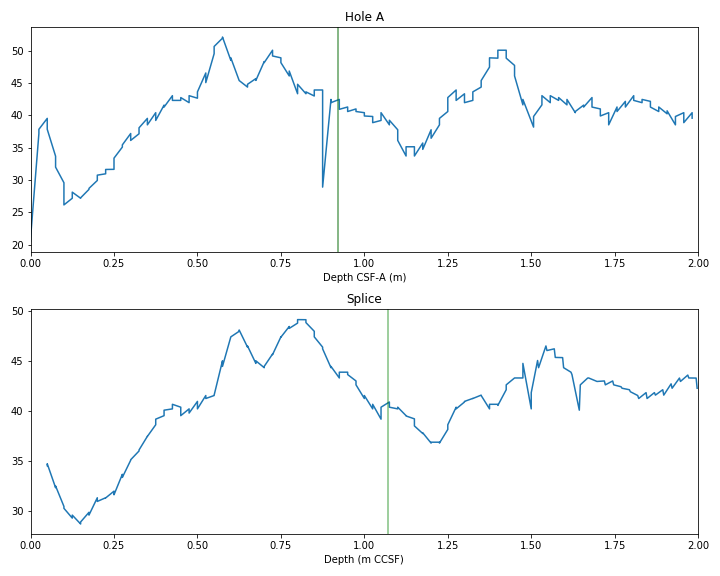

In [727]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=0
x2=2

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(.92,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(1.07,c='green',alpha=.5)

plt.tight_layout()

CCSF Depth = .977
### 2. 361	U1474	A	1	H	3	W	57.0	3.570

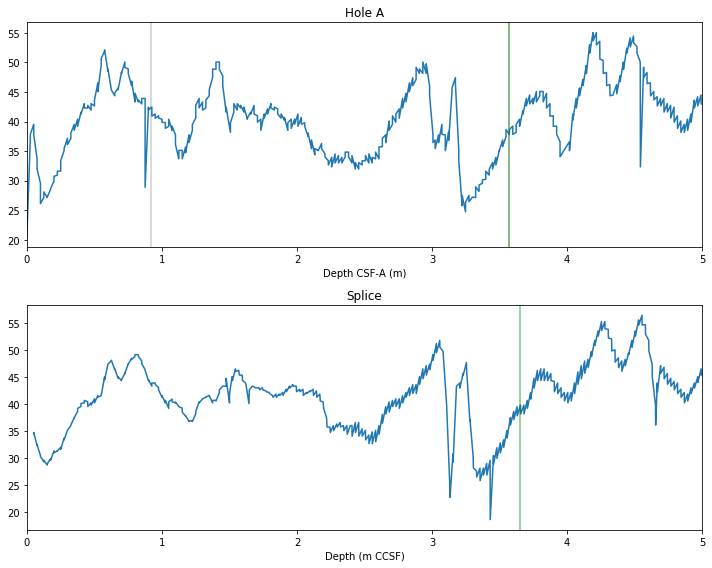

In [474]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=0
x2=5

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(3.570,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(3.65,c='green',alpha=.5)

plt.tight_layout()

### 3. 361	U1474	A	2	H	1	W	129.0	6.690

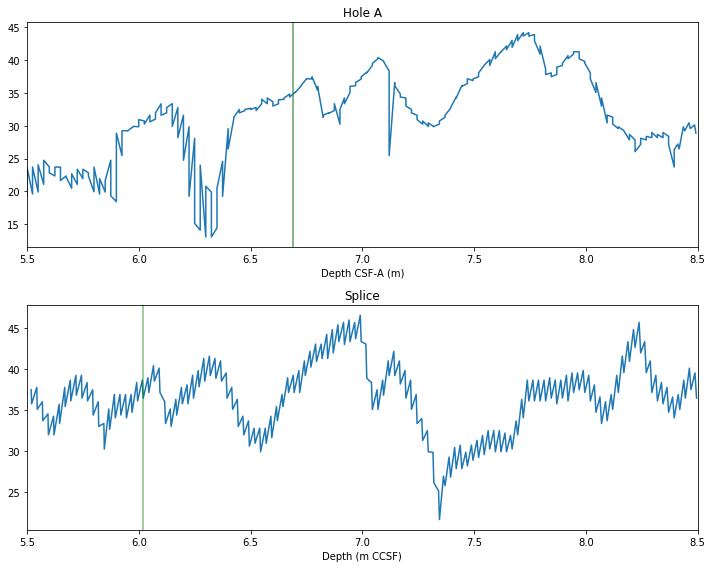

In [475]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=5.5
x2=8.5

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(6.69,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(6.02,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 6.02

### 4. 361	U1474	A	2	H	3	W	51.0	8.910

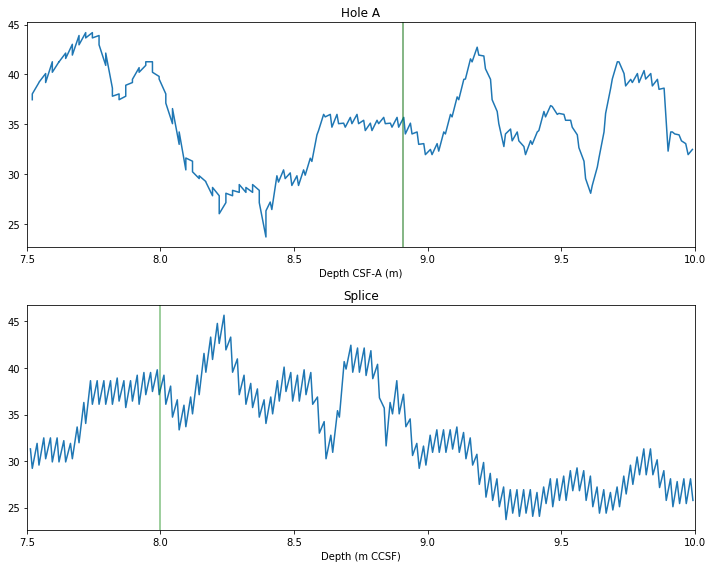

In [506]:
%matplotlib inline
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=7.5
x2=10

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(8.910,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(8,c='green',alpha=.5)

plt.tight_layout()

### 5. 361	U1474	A	2	H	5	W	20.0	11.600

<IPython.core.display.Javascript object>


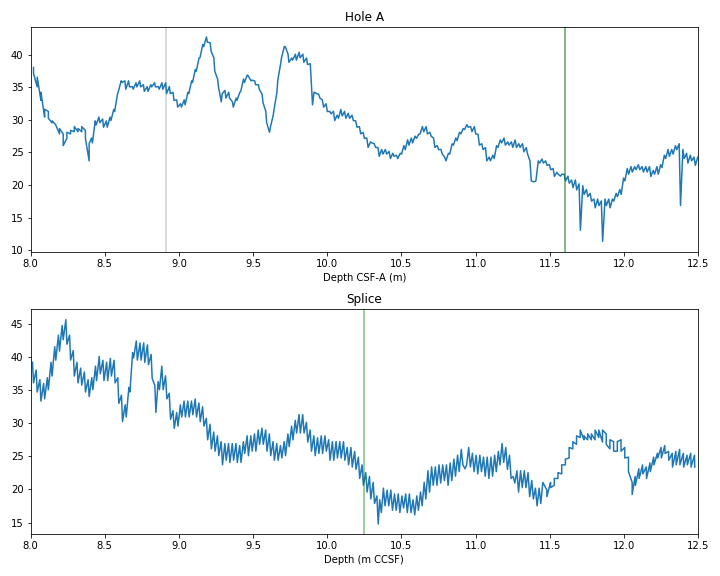

In [511]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=8
x2=12.5

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(11.6,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(10.25,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 10.25

### 6.	361	U1474	A	2	H	7	W	22.5	14.335

<IPython.core.display.Javascript object>


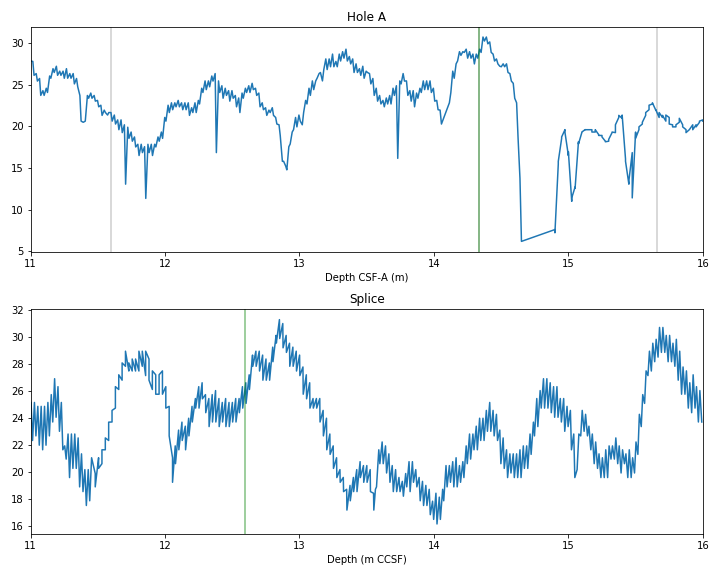

In [522]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=11
x2=16

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(14.335,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(12.596,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 12.596

### 7. 361	U1474	A	3	H	1	W	76.0	15.660

<IPython.core.display.Javascript object>


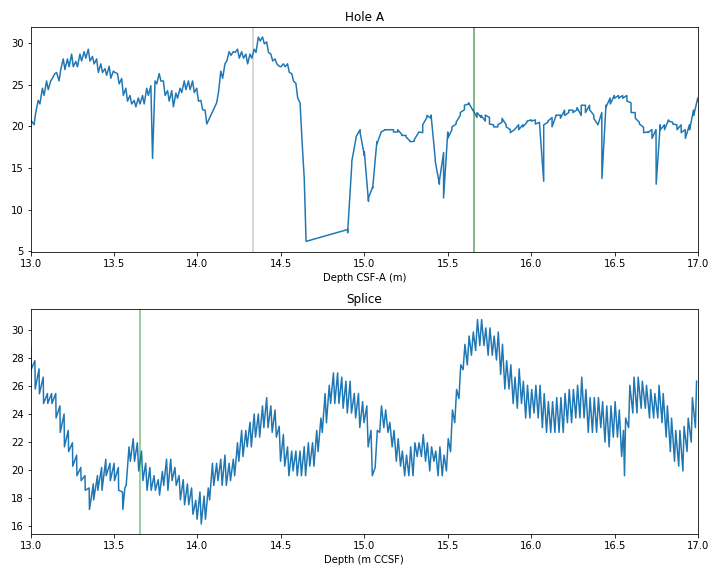

In [728]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=13
x2=17

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(15.66,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(13.656,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 13.656

### 8. 361	U1474	A	3	H	3	W	76	18.66

<IPython.core.display.Javascript object>


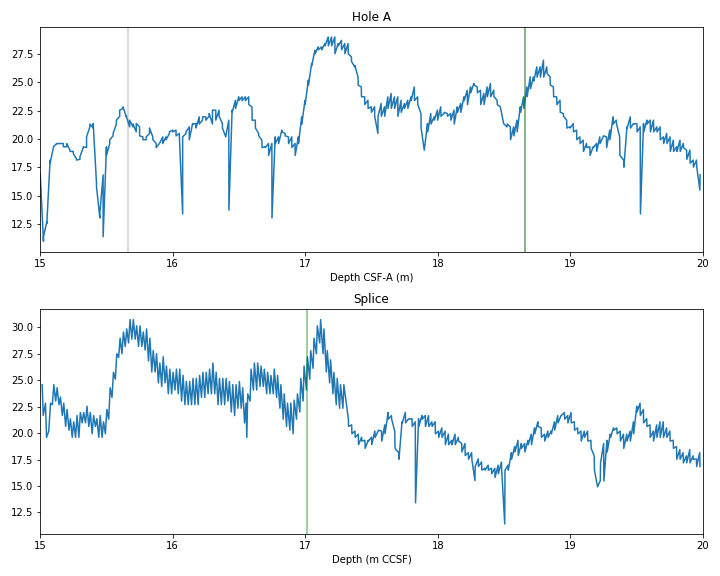

In [525]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=15
x2=20

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(18.66,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(17.010,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 17.010

### 9. 361	U1474	A	3	H	5	W	76	21.66

<IPython.core.display.Javascript object>


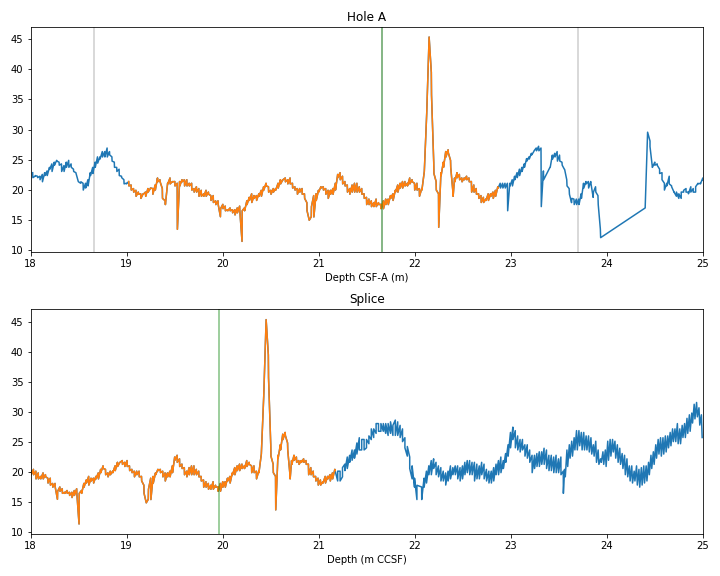

In [526]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=18
x2=25

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(21.66,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(19.963,c='green',alpha=.5)

plt.tight_layout()

In the Splice. Depth = 19.963

### 10. 361	U1474	A	3	H	7	W	30.0	23.700	

<IPython.core.display.Javascript object>


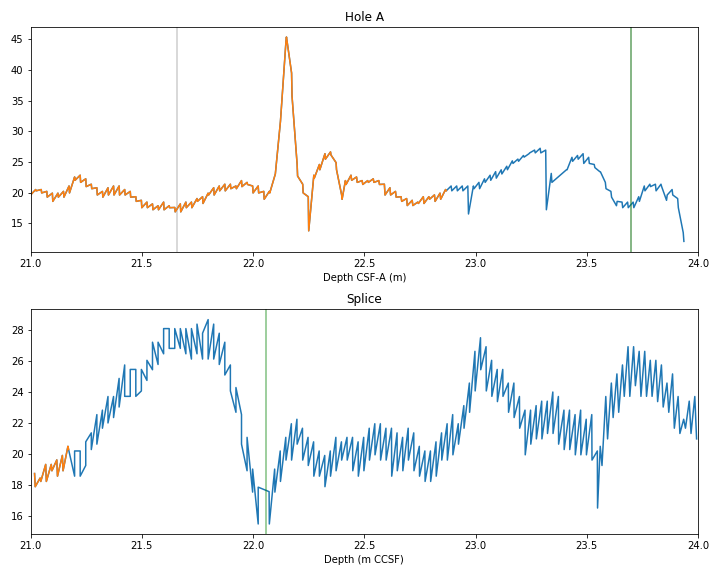

In [535]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=21
x2=24

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(23.7,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(22.06,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 22.06

### 11.	361	U1474	A	4	H	2	A	84.0	26.740

<IPython.core.display.Javascript object>


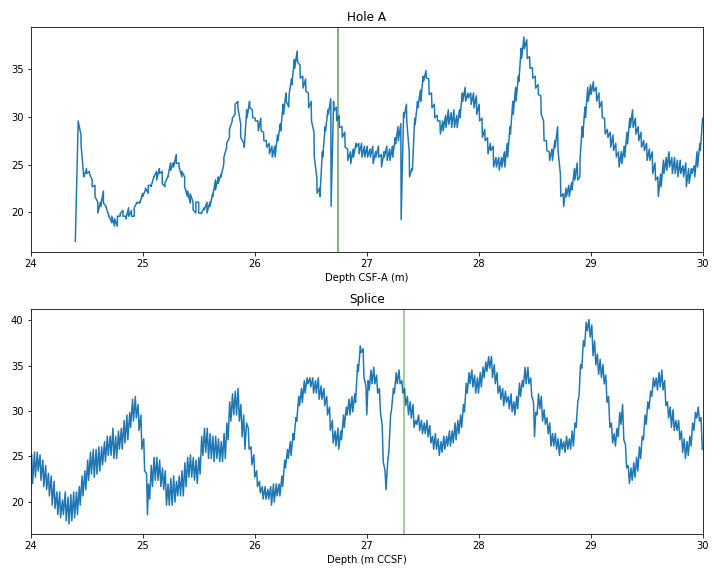

In [733]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=24
x2=30

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(26.740,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(27.336,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 27.336

### 12. 361	U1474	A	4	H	4	W	113	30.03

<IPython.core.display.Javascript object>


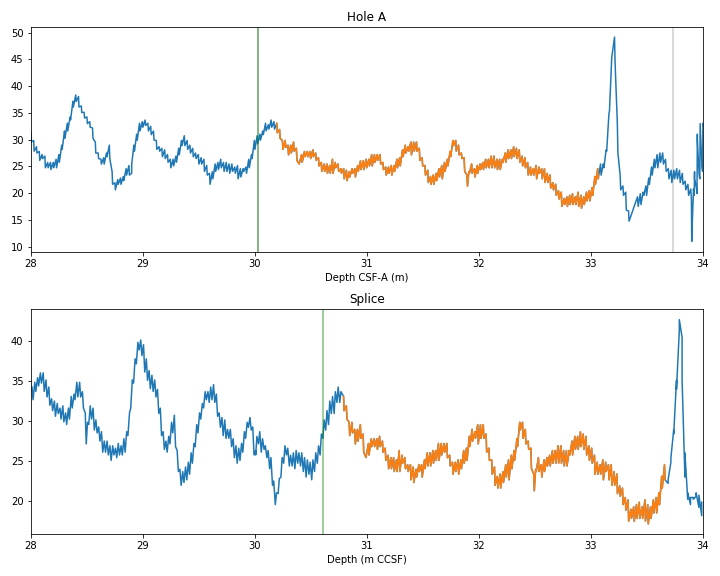

In [704]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=28
x2=34

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(30.03,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(30.614,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 30.614

### 13.	361	U1474	A	4	H	7	W	33.0	33.730
### &
### 14. 361	U1474	A	5	H	1	W	84	34.74

<IPython.core.display.Javascript object>


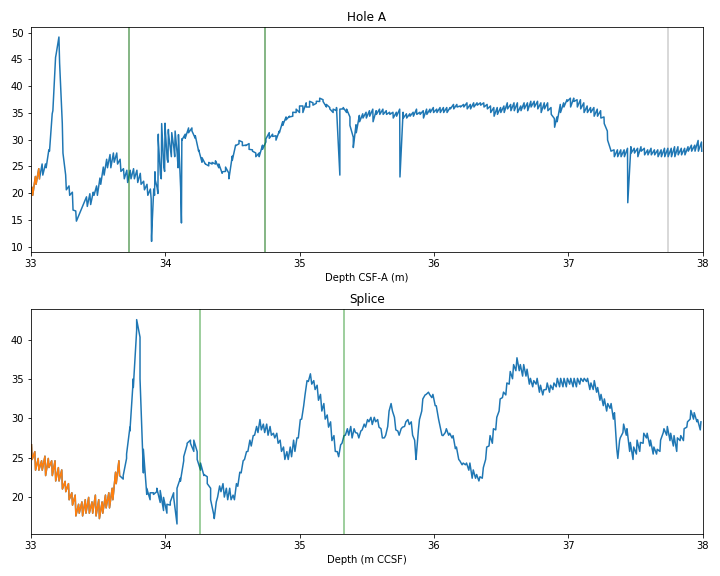

In [541]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=33
x2=38

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(33.73,c='green',alpha=.5)
ax.axvline(34.74,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(34.26,c='green',alpha=.5)
ax.axvline(35.33,c='green',alpha=.5)

plt.tight_layout()

Splice Depths = 34.26 and 35.33

### 15.	361	U1474	A	5	H	3	W	84.0	37.740

<IPython.core.display.Javascript object>


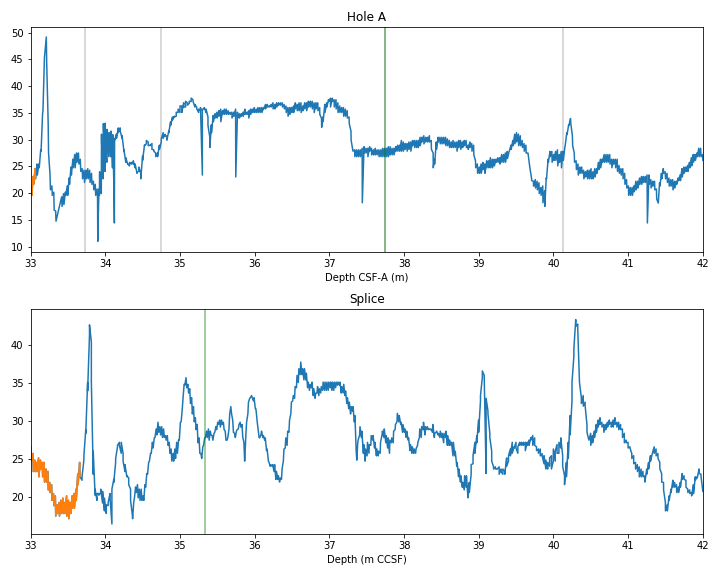

In [582]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=33
x2=42

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(37.74,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(35.33,c='green',alpha=.5)

plt.tight_layout()

<IPython.core.display.Javascript object>


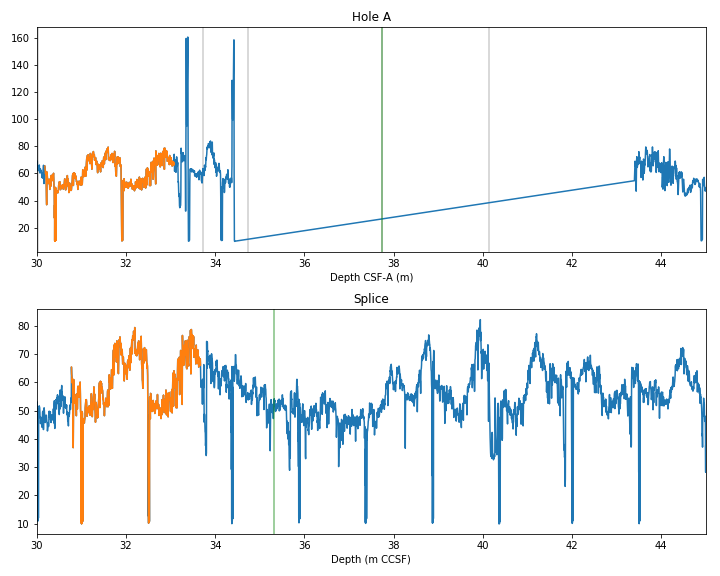

In [670]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=30
x2=45

ax=axes[0]
rgbA['B'].loc[x1:x2].plot(ax=ax)
rgb_spliceA_CSFA['B'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(37.74,c='green',alpha=.5)

ax=axes[1]
rgb_splice['B'].loc[x1:x2].plot(ax=ax)
rgb_spliceA_CCSF['B'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(35.33,c='green',alpha=.5)

plt.tight_layout()

I think this samples is actually unsalvagable. Best guess below 37.5 and above 39

### 16.	361	U1474	A	5	H	5	W	23.0	40.130

<IPython.core.display.Javascript object>


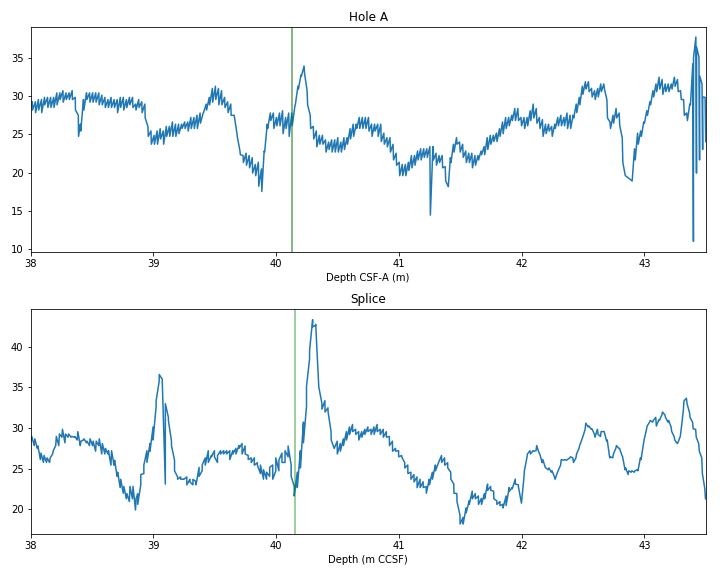

In [678]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=38
x2=43.5

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(40.130,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(40.154,c='green',alpha=.5)

plt.tight_layout()

### 17. 361	U1474	A	6	H	2	W	77	45.67

<IPython.core.display.Javascript object>


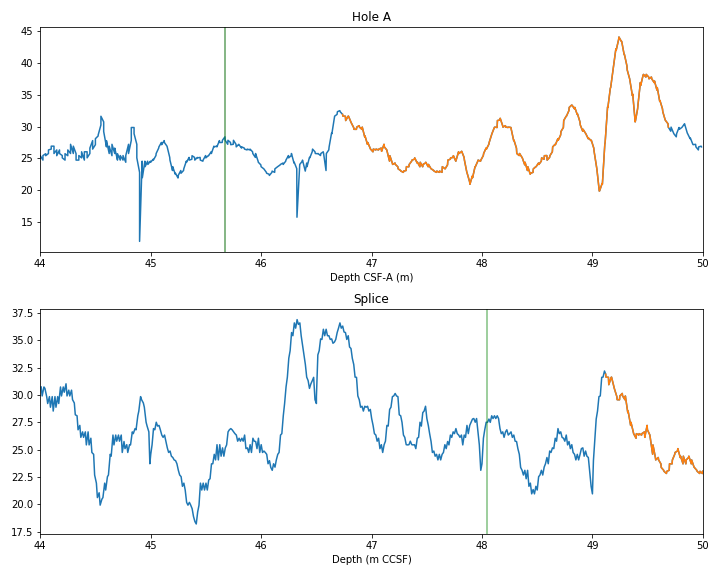

In [679]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=44
x2=50

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(45.67,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(48.044,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 48.044

### 361	U1474	A	6	H	5	W	84	50.24

<IPython.core.display.Javascript object>


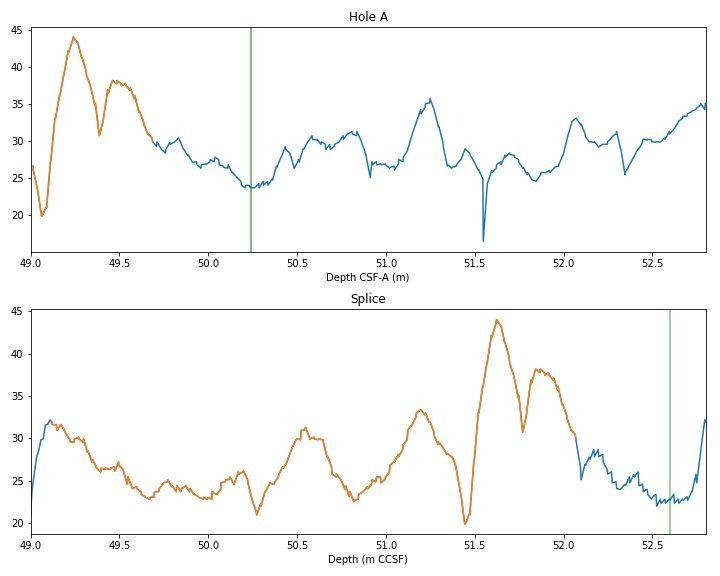

In [705]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=49
x2=52.8

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(50.24,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(52.6,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 52.6

### 19.	361	U1474	A	6	H	7	W	54.0	52.940

<IPython.core.display.Javascript object>


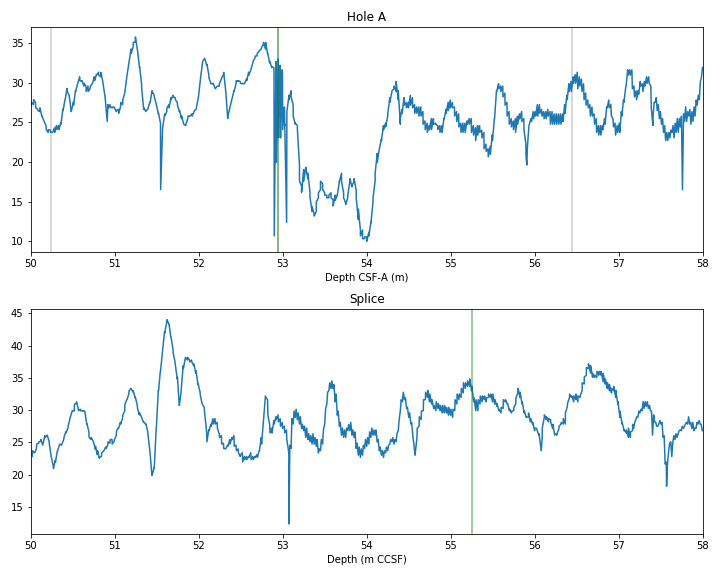

In [694]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=50
x2=58

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(52.940,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(55.25,c='green',alpha=.5)

plt.tight_layout()

<IPython.core.display.Javascript object>


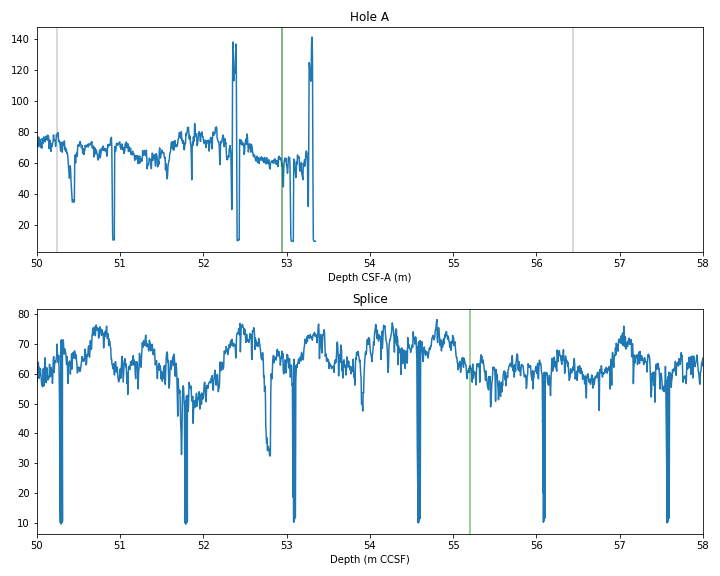

In [691]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=50
x2=58

ax=axes[0]
rgbA['R'].loc[x1:x2].plot(ax=ax)
# rgb_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(52.940,c='green',alpha=.5)

ax=axes[1]
rgb_splice['R'].loc[x1:x2].plot(ax=ax)
# rgb_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(55.2,c='green',alpha=.5)

plt.tight_layout()

Probably compromised. Best Depth = 55.2

### 20.	361	U1474	A	7	H	3	W	54.0	56.440

<IPython.core.display.Javascript object>


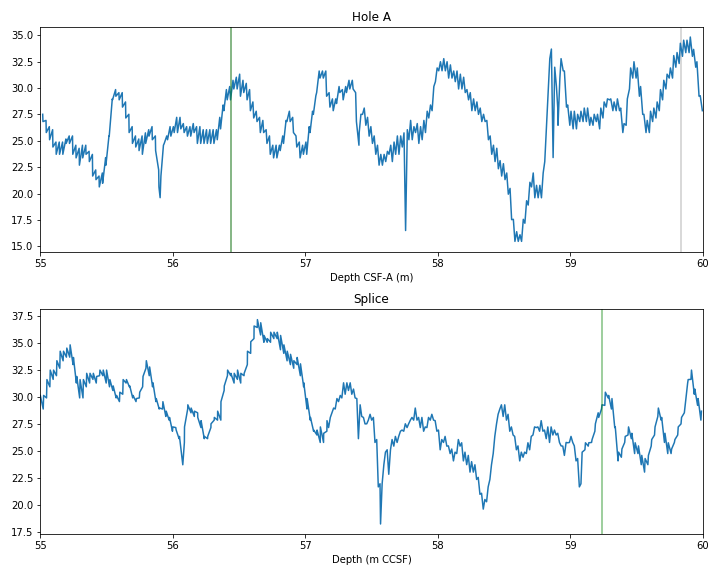

In [698]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=55
x2=60

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(56.440,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(59.24,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 59.24

### 21.	361	U1474	A	7	H	5	W	93.5	59.835	62.448

<IPython.core.display.Javascript object>


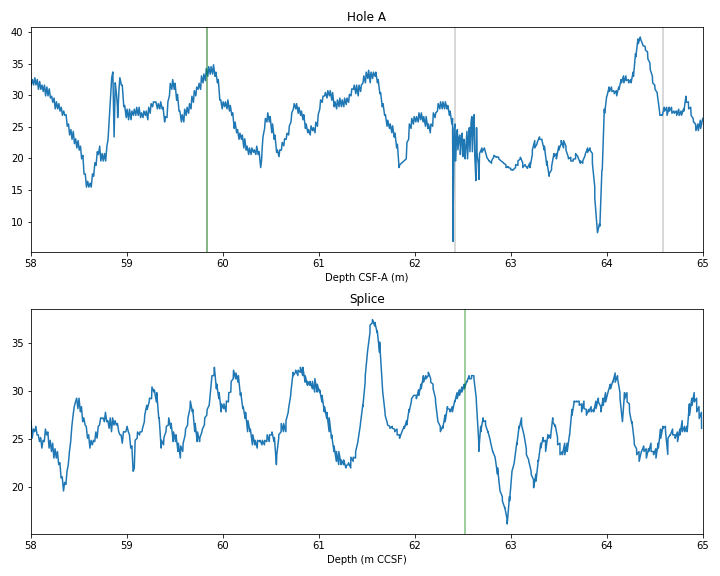

In [703]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=58
x2=65

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(59.835,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(62.52,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 62.52

### 361	U1474	A	7	H	7	W	52.0	62.420

<IPython.core.display.Javascript object>


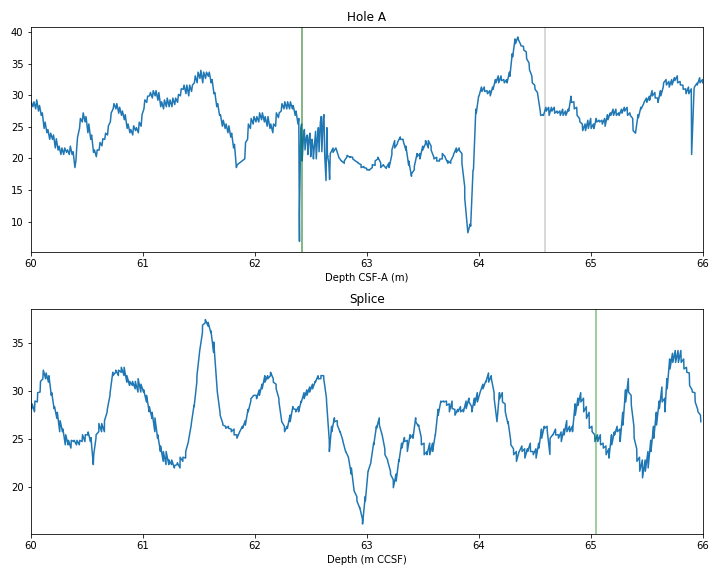

In [706]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=60
x2=66

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(62.420,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(65.05,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 65.05. This sample is sketchy. Check XRF scans
### 361	U1474	A	10	H	2	W	106	83.96

<IPython.core.display.Javascript object>


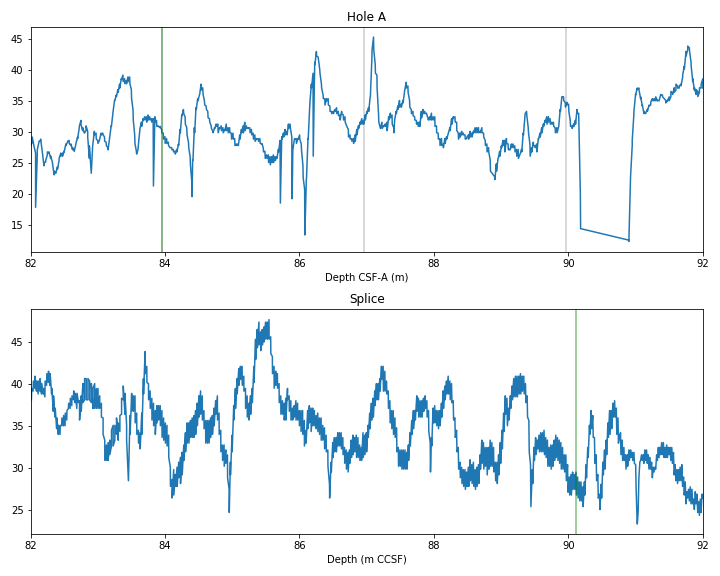

In [710]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=82
x2=92

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(83.96,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(90.11,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 89.913
### 361	U1474	A	10	H	4	W	106	86.96

<IPython.core.display.Javascript object>


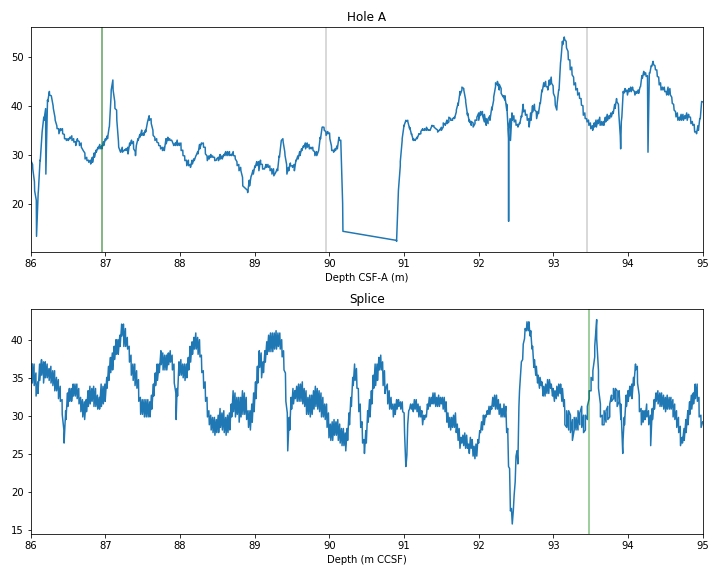

In [708]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=86
x2=95

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(86.96,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(93.48,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 93.48

### 361	U1474	A	10	H	6	W	106	89.96

<IPython.core.display.Javascript object>


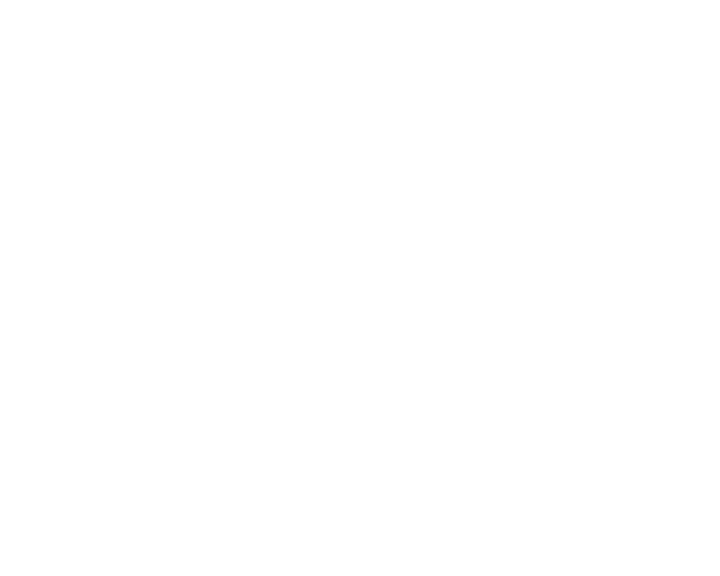

In [486]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=88
x2=99

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(89.96,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(96.85,c='green',alpha=.5)

plt.tight_layout()

### 361	U1474	A	12	H	4	W	104	105.97

<IPython.core.display.Javascript object>


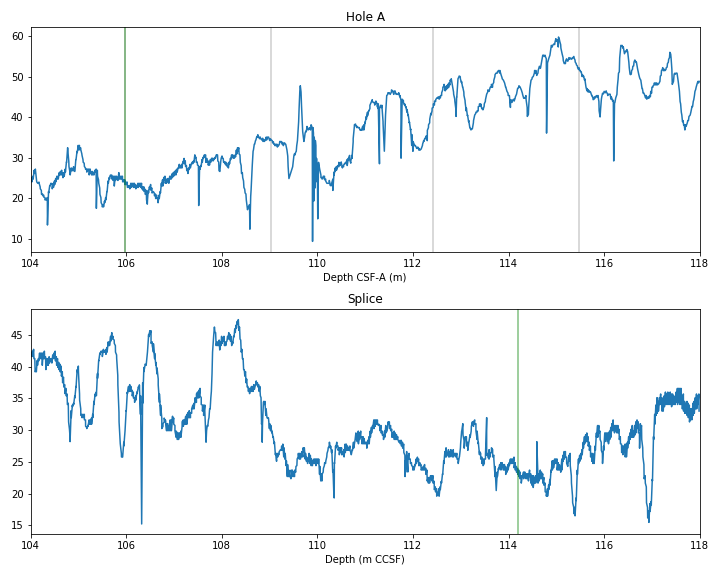

In [712]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=104
x2=118

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(105.97,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(114.2,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 114.2
### 361	U1474	A	13	H	4	W	106.0

<IPython.core.display.Javascript object>


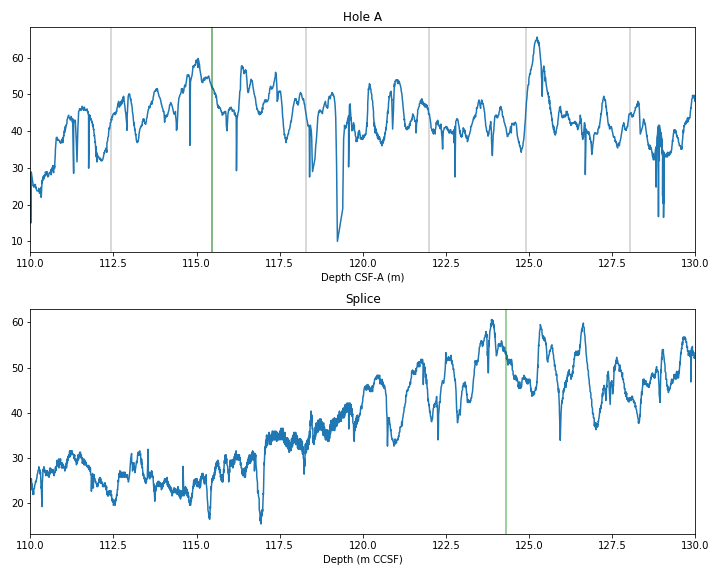

In [714]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=110
x2=130

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(115.47,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(124.323,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 124.323
### 361	U1474	A	14	H	4	W	102.0	124.92

<IPython.core.display.Javascript object>


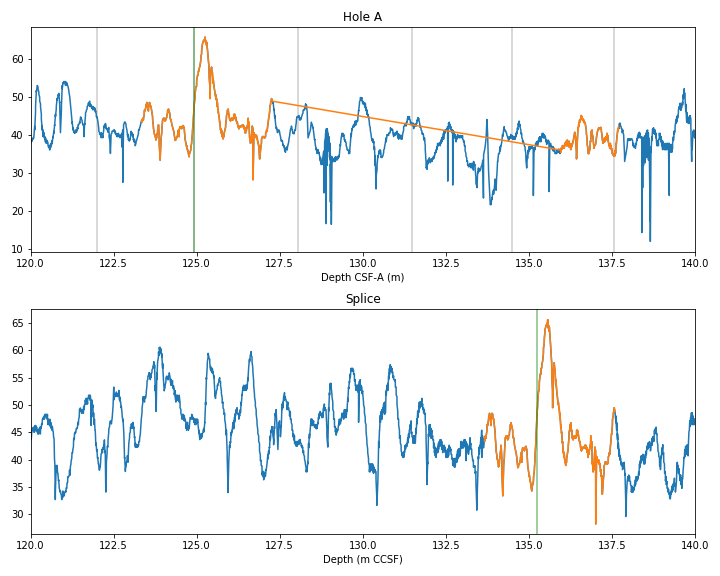

In [715]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=120
x2=140

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(124.92,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(135.237,c='green',alpha=.5)

plt.tight_layout()

In the Splice. Depth 135.234
### 361	U1474	A	15	H	2	W	106.0	131.47

<IPython.core.display.Javascript object>


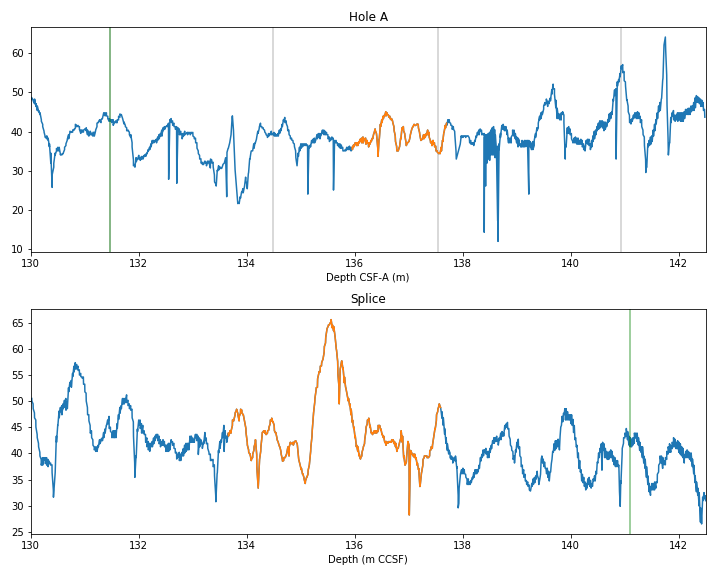

In [717]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=130
x2=142.5

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(131.47,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(141.104,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 141.104
### 361	U1474	A	16	H	6	W	102.0	146.92

<IPython.core.display.Javascript object>


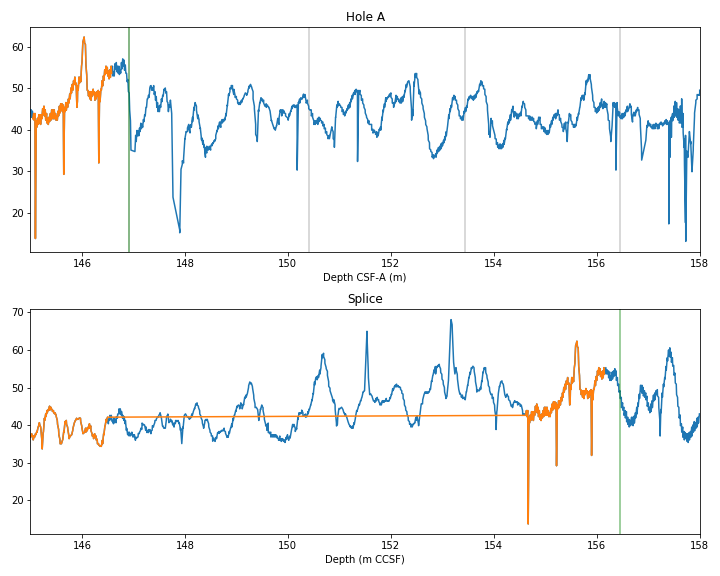

In [718]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=145
x2=158

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(146.92,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(156.460,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 156.460
### 361	U1474	A	17	H	2	W	102.0	150.42

<IPython.core.display.Javascript object>


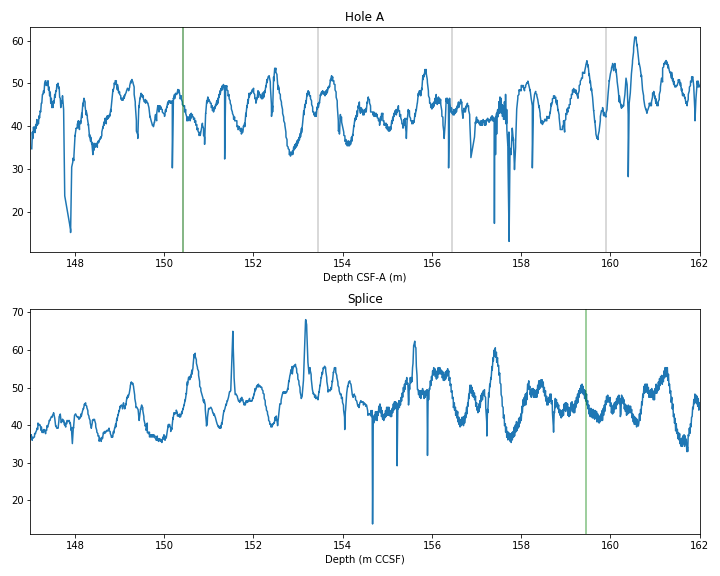

In [719]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=147
x2=162

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(150.42,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(159.446,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 159.446
### 361	U1474	A	18	H	4	W	101.0	162.91

<IPython.core.display.Javascript object>


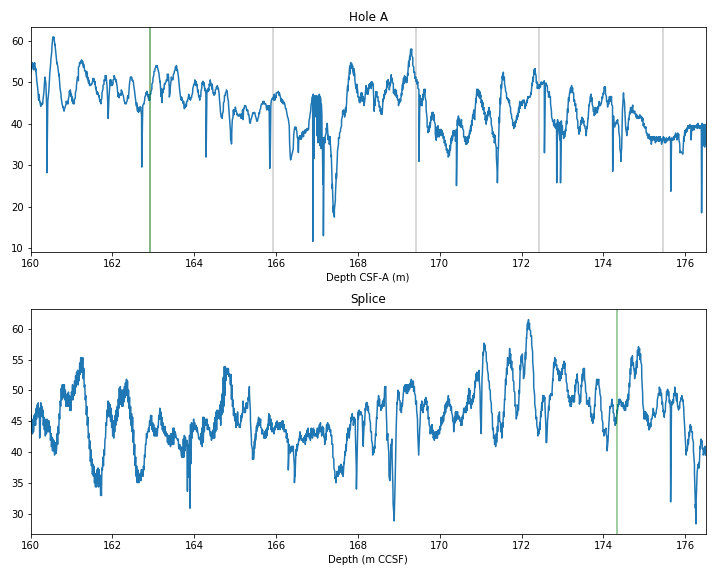

In [722]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=160
x2=176.5

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(162.91,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
# MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(174.325,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 174.3
### 361	U1474	A	20	H	2	W	96	178.86

<IPython.core.display.Javascript object>


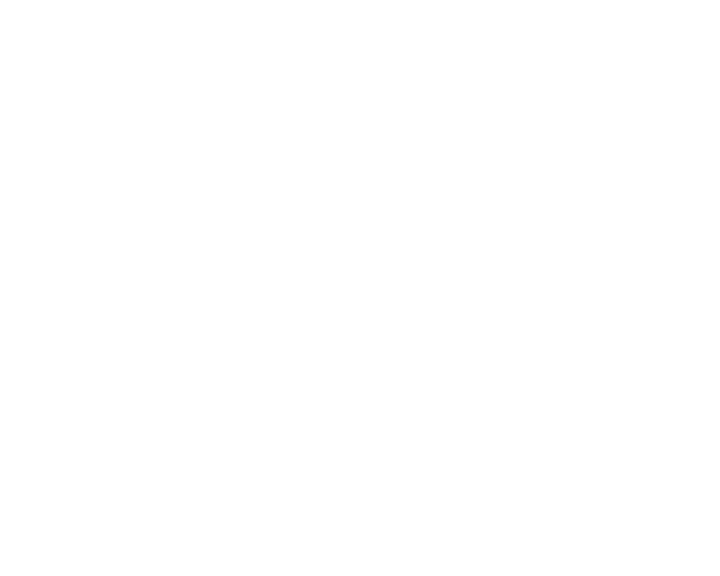

In [494]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=175
x2=195

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(178.86,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(193.015,c='green',alpha=.5)

plt.tight_layout()

In the Splice. Depth = 193.015
### 361	U1474	A	20	H	4	W	97	181.87

<IPython.core.display.Javascript object>


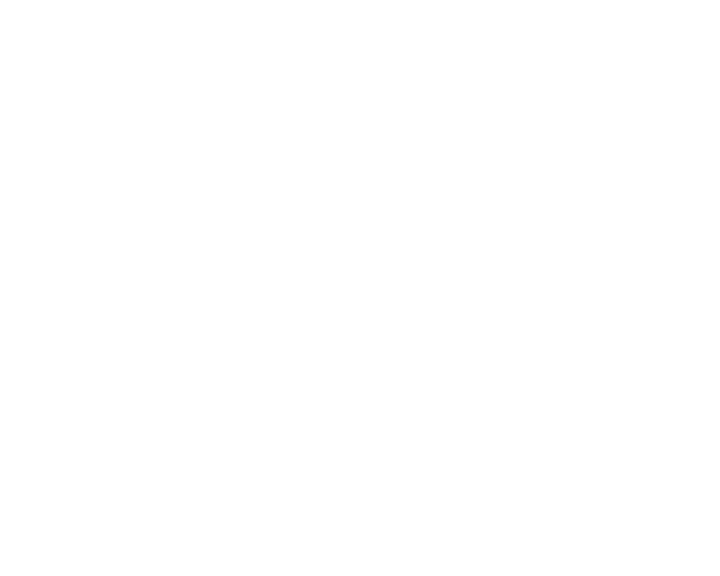

In [495]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=180
x2=200

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(181.87,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(196.025,c='green',alpha=.5)

plt.tight_layout()

In the Splice. Depth = 196.025
### 361	U1474	A	20	H	5	W	102	183.41

<IPython.core.display.Javascript object>


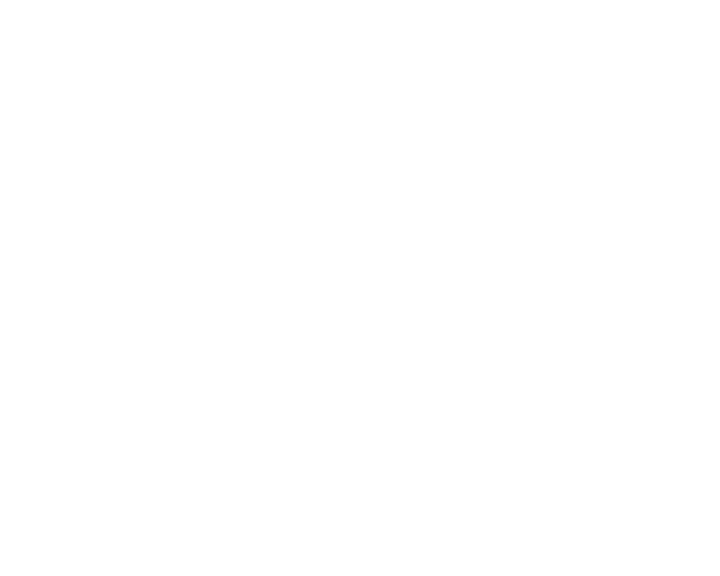

In [496]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=180
x2=200

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(183.41,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(197.565,c='green',alpha=.5)

plt.tight_layout()

In the Splice. Depth = 197.565
### U1474	A	21	H	2	W	106	188.46 & 361	U1474	A	22	H	2	W	102	197.92

<IPython.core.display.Javascript object>


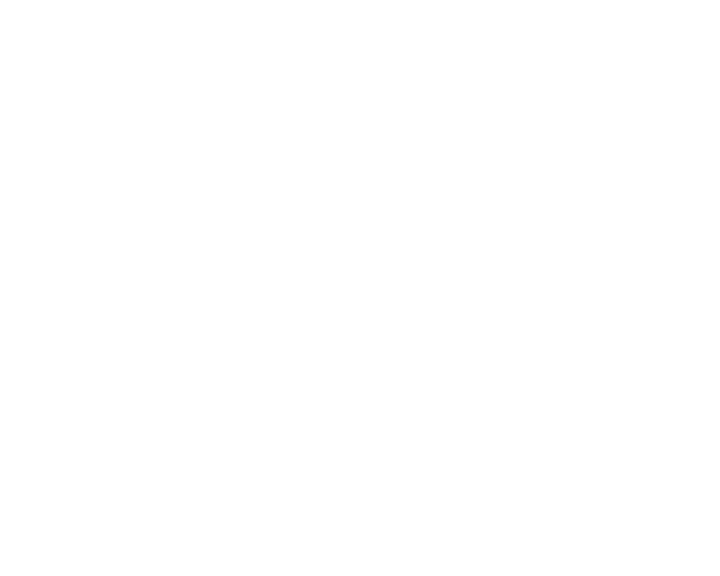

In [497]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=187
x2=210

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(188.46,c='green',alpha=.5)
ax.axvline(197.92,c='green',alpha=.5)

ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(205.957,c='green',alpha=.5)
ax.axvline(216.915,c='green',alpha=.5)

plt.tight_layout()

Both of these are in the splice. Depth = 205.957 & 216.915
### 361	U1474	A	24	H	4	W	110	219.97

<IPython.core.display.Javascript object>


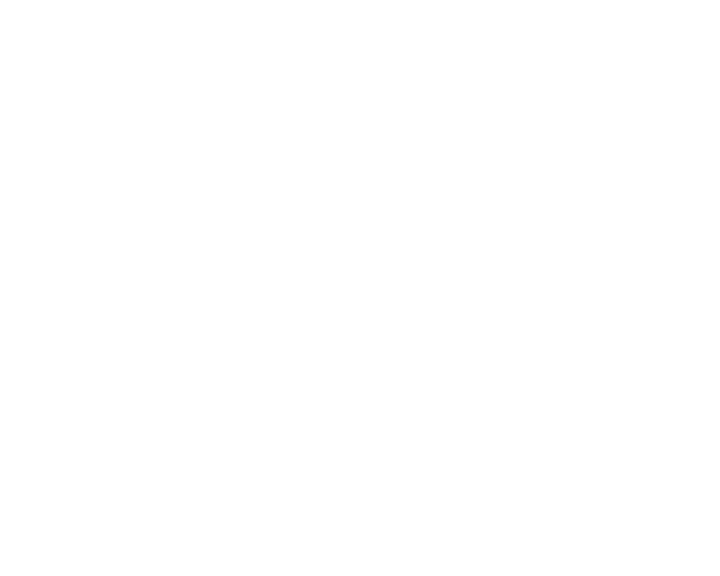

In [498]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=200
x2=250

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(219.97,c='green',alpha=.5)


ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(239.154,c='green',alpha=.5)

plt.tight_layout()

We analyzed a MAD sample for a depth at which there isn't even splice available...
The closest Depth it could be is the end of F28F4, 237.73
### 361	U1474	A	25	H	2	W	102.0	224.51	

<IPython.core.display.Javascript object>


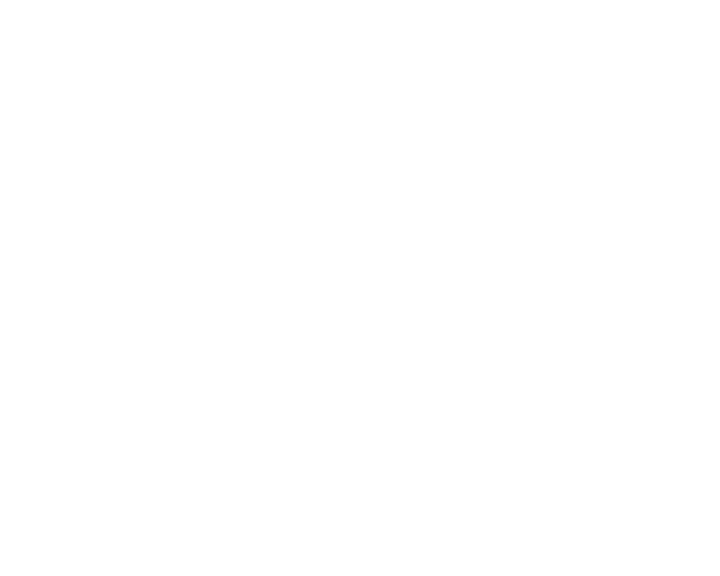

In [499]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=220
x2=250

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(224.51,c='green',alpha=.5)


ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(244.048,c='green',alpha=.5)

plt.tight_layout()

In the splice. Depth = 244.048 m
### 361	U1474	A	25	H	4	W	102	227.52

<IPython.core.display.Javascript object>


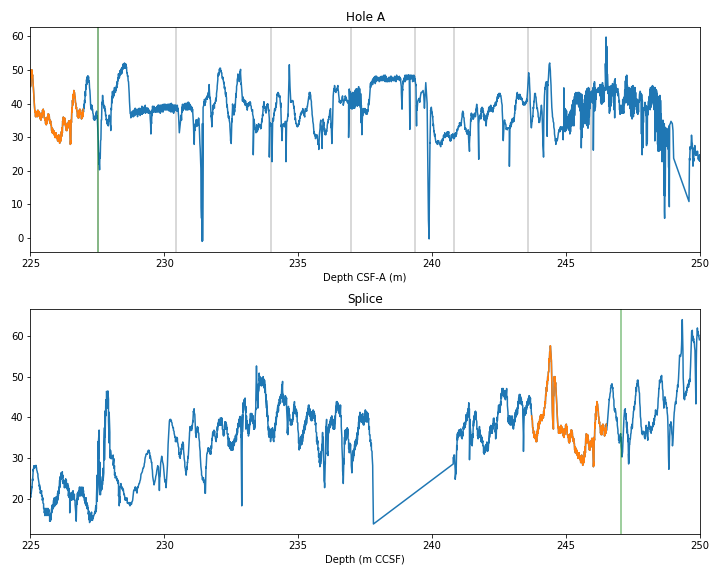

In [723]:
%matplotlib notebook
fig,axes=plt.subplots(figsize=(10,8),nrows=2)

x1=225
x2=250

ax=axes[0]
MSA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CSFA['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
for s in MADA.index:
    ax.axvline(MADA.loc[s,'Depth CSF-A (m)'],zorder=-1,color='k',alpha=.2)
ax.set_title('Hole A')
ax.set_xlim(x1,x2)
ax.axvline(227.52,c='green',alpha=.5)


ax=axes[1]
MS_splice['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
MS_spliceA_CCSF['Magnetic susceptibility (instr. units)'].loc[x1:x2].plot(ax=ax)
ax.set_title('Splice')
ax.set_xlim(x1,x2)
ax.axvline(247.074,c='green',alpha=.5)

plt.tight_layout()

Splice Depth = 247.074